<a href="https://colab.research.google.com/github/693080593/research/blob/master/cHB_Mcl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080920.csv')
Oil_Yields = data['Bio-crude Oil Yield']
Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.000,0.001,0.001,0.001,0.001,0.001,0.001,85.50
30,30.906,27.270,0.001,0.001,32.724,0.001,9.100,41.00
60,13.300,25.500,0.001,0.001,38.700,0.001,0.001,27.10
...,...,...,...,...,...,...,...,...
150,0.001,0.001,0.001,0.001,100.000,0.001,0.001,1.29
180,0.001,0.001,39.200,35.100,0.001,20.200,0.001,26.98
210,0.001,0.001,0.001,100.000,0.001,0.001,0.001,6.50


In [60]:
# Check the dataset with the first and last three rows
pd.set_option('display.max_rows',6)
data

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield,Unnamed: 8
0,100.00,0.01,0.01,0.01,0.01,0.01,0.01,85.50,NaN
1,100.00,0.01,0.01,0.01,0.01,0.01,0.01,82.10,NaN
2,100.00,0.01,0.01,0.01,0.01,0.01,0.01,90.60,NaN
...,...,...,...,...,...,...,...,...,...
222,0.01,0.01,0.01,0.01,0.01,100.00,0.01,1.30,NaN
223,0.01,0.01,0.01,0.01,0.01,100.00,0.01,3.93,NaN
224,0.01,0.01,0.01,0.01,0.01,100.00,0.01,0.10,NaN


In [3]:
# Check the whole information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lipid                225 non-null    float64
 1   Protein              225 non-null    float64
 2   Cellulose            225 non-null    float64
 3   Hemicellulose        225 non-null    float64
 4   Carbohydrate         225 non-null    float64
 5   Lignin               225 non-null    float64
 6   Ash                  225 non-null    float64
 7   Bio-crude Oil Yield  225 non-null    float64
dtypes: float64(8)
memory usage: 14.2 KB


In [4]:
# TODO: Minimum price of the data
minimum_Oil_Yields = np.min(Oil_Yields)

# TODO: Maximum price of the data
maximum_Oil_Yields = np.max(Oil_Yields)

# TODO: Mean price of the data
mean_Oil_Yields = np.mean(Oil_Yields)

# TODO: Median price of the data
median_Oil_Yields = np.median(Oil_Yields)

# TODO: Standard deviation of prices of the data
std_Oil_Yields = np.std(Oil_Yields)

# Show the calculated statistics

print("Statistics for bio-crude dataset:\n")
print("Minimum bio-crude oil yield:{: .2f} wt%".format(minimum_Oil_Yields))
print("Maximum bio-crude oil yield:{: .2f} wt%".format(maximum_Oil_Yields))
print("Mean bio-crude oil yield:{: .2f} wt%".format(mean_Oil_Yields))
print("Median bio-crude oil yield:{: .2f} wt%".format(median_Oil_Yields))
print("Standard deviation of bio-crude oil yield:{: .2f} wt%".format(std_Oil_Yields))

data.describe()

Statistics for bio-crude dataset:

Minimum bio-crude oil yield: 0.10 wt%
Maximum bio-crude oil yield: 95.86 wt%
Mean bio-crude oil yield: 27.44 wt%
Median bio-crude oil yield: 24.70 wt%
Standard deviation of bio-crude oil yield: 16.71 wt%


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,11.917333,26.313333,17.241605,7.374222,17.050222,9.142230,6.414222,27.436691
std,20.187868,25.337980,25.593518,15.390026,23.677736,17.013235,10.789614,16.749712
...,...,...,...,...,...,...,...,...
50%,3.500000,23.100000,0.000000,0.000000,8.700000,0.000000,1.100000,24.700000
75%,13.900000,46.400000,29.200000,8.800000,25.500000,14.200000,7.000000,36.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,95.860000


In [5]:
# Skewness coefficient
for i in data.columns:
  print('{} Skewness coefficient: '.format(i),data[i].skew())

Lipid Skewness coefficient:  2.5707376189981916
Protein Skewness coefficient:  0.8165707160012146
Cellulose Skewness coefficient:  1.5577027129724896
Hemicellulose Skewness coefficient:  3.226162696245252
Carbohydrate Skewness coefficient:  2.0337525328100763
Lignin Skewness coefficient:  2.786936481678996
Ash Skewness coefficient:  2.089855145797541
Bio-crude Oil Yield Skewness coefficient:  1.33142066201849


In [6]:
# Kurtosis Coefficient
for i in data.columns:
  print("{} Kurtosis Coefficient: ".format(i),data[i].kurt())

Lipid Kurtosis Coefficient:  7.121495631166814
Protein Kurtosis Coefficient:  0.1350514975326833
Cellulose Kurtosis Coefficient:  1.7319930342029077
Hemicellulose Kurtosis Coefficient:  13.631299452953623
Carbohydrate Kurtosis Coefficient:  4.368195679497841
Lignin Kurtosis Coefficient:  9.993553380975209
Ash Kurtosis Coefficient:  3.6278849014364254
Bio-crude Oil Yield Kurtosis Coefficient:  2.908263538693221


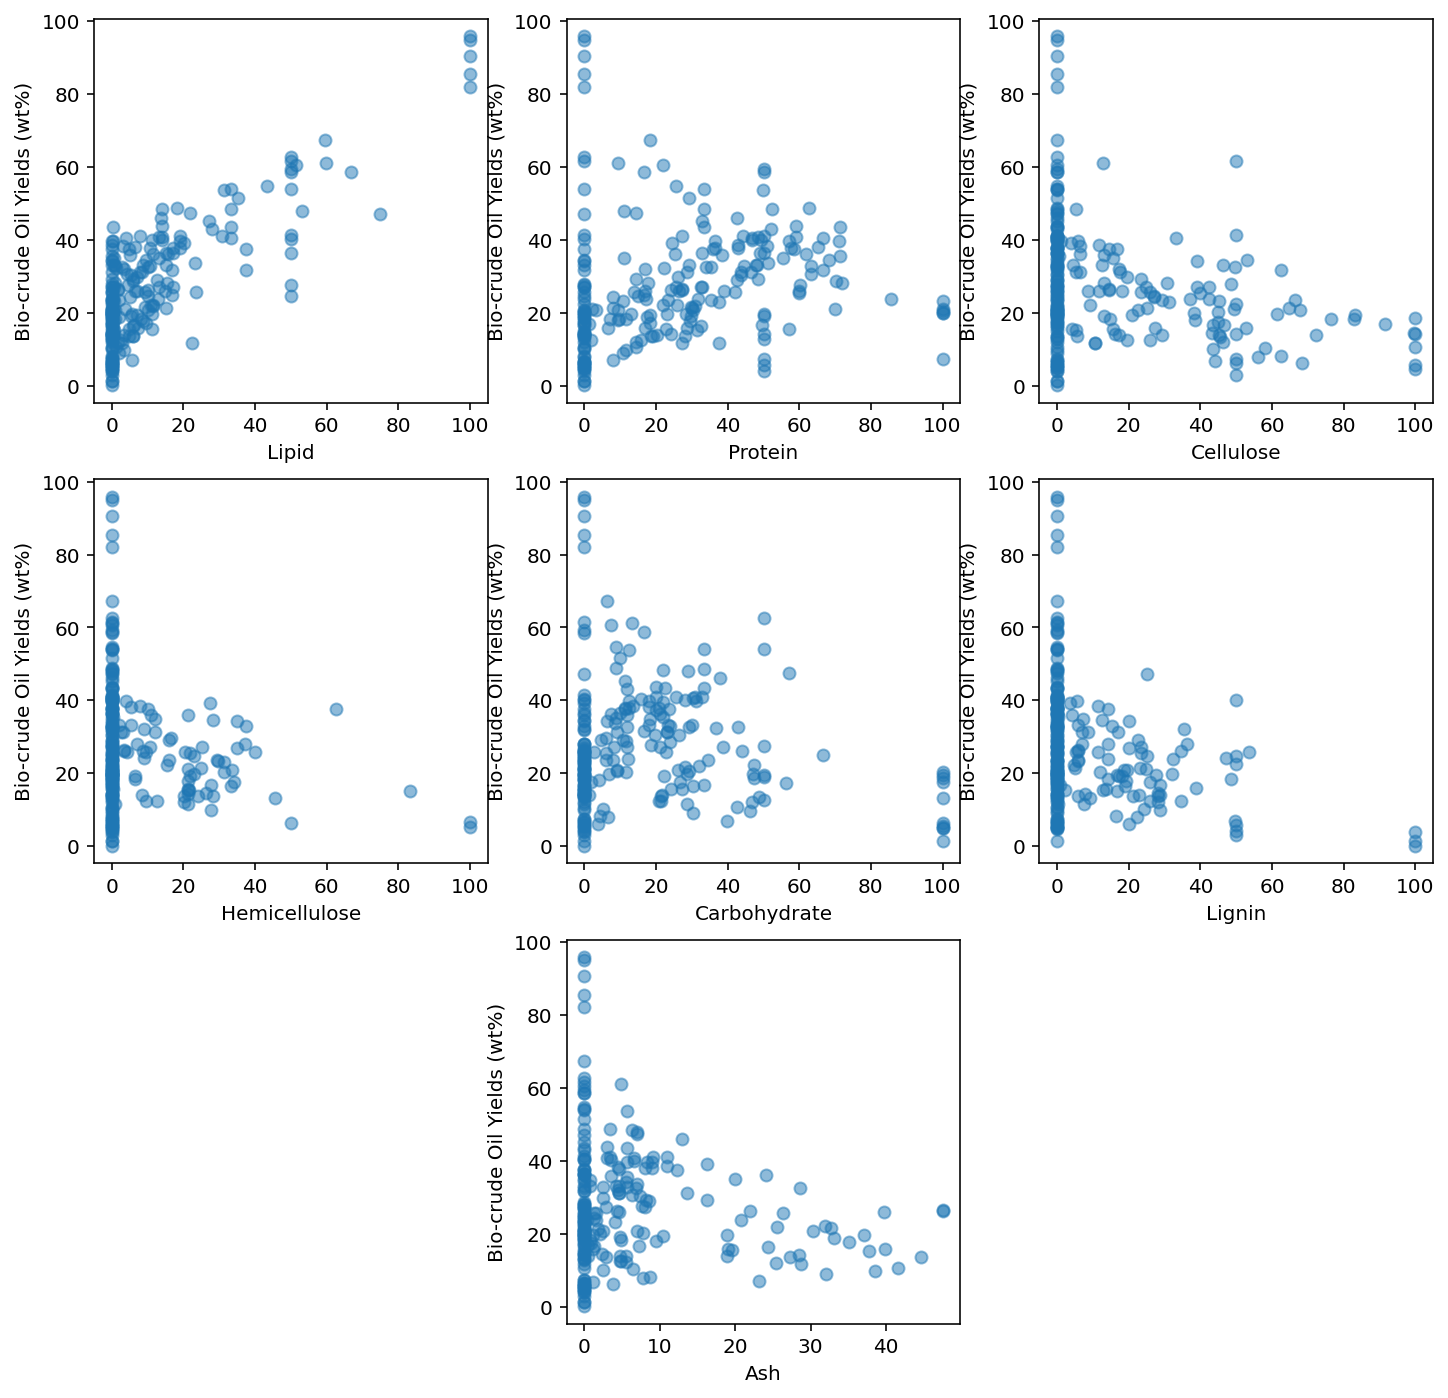

In [7]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


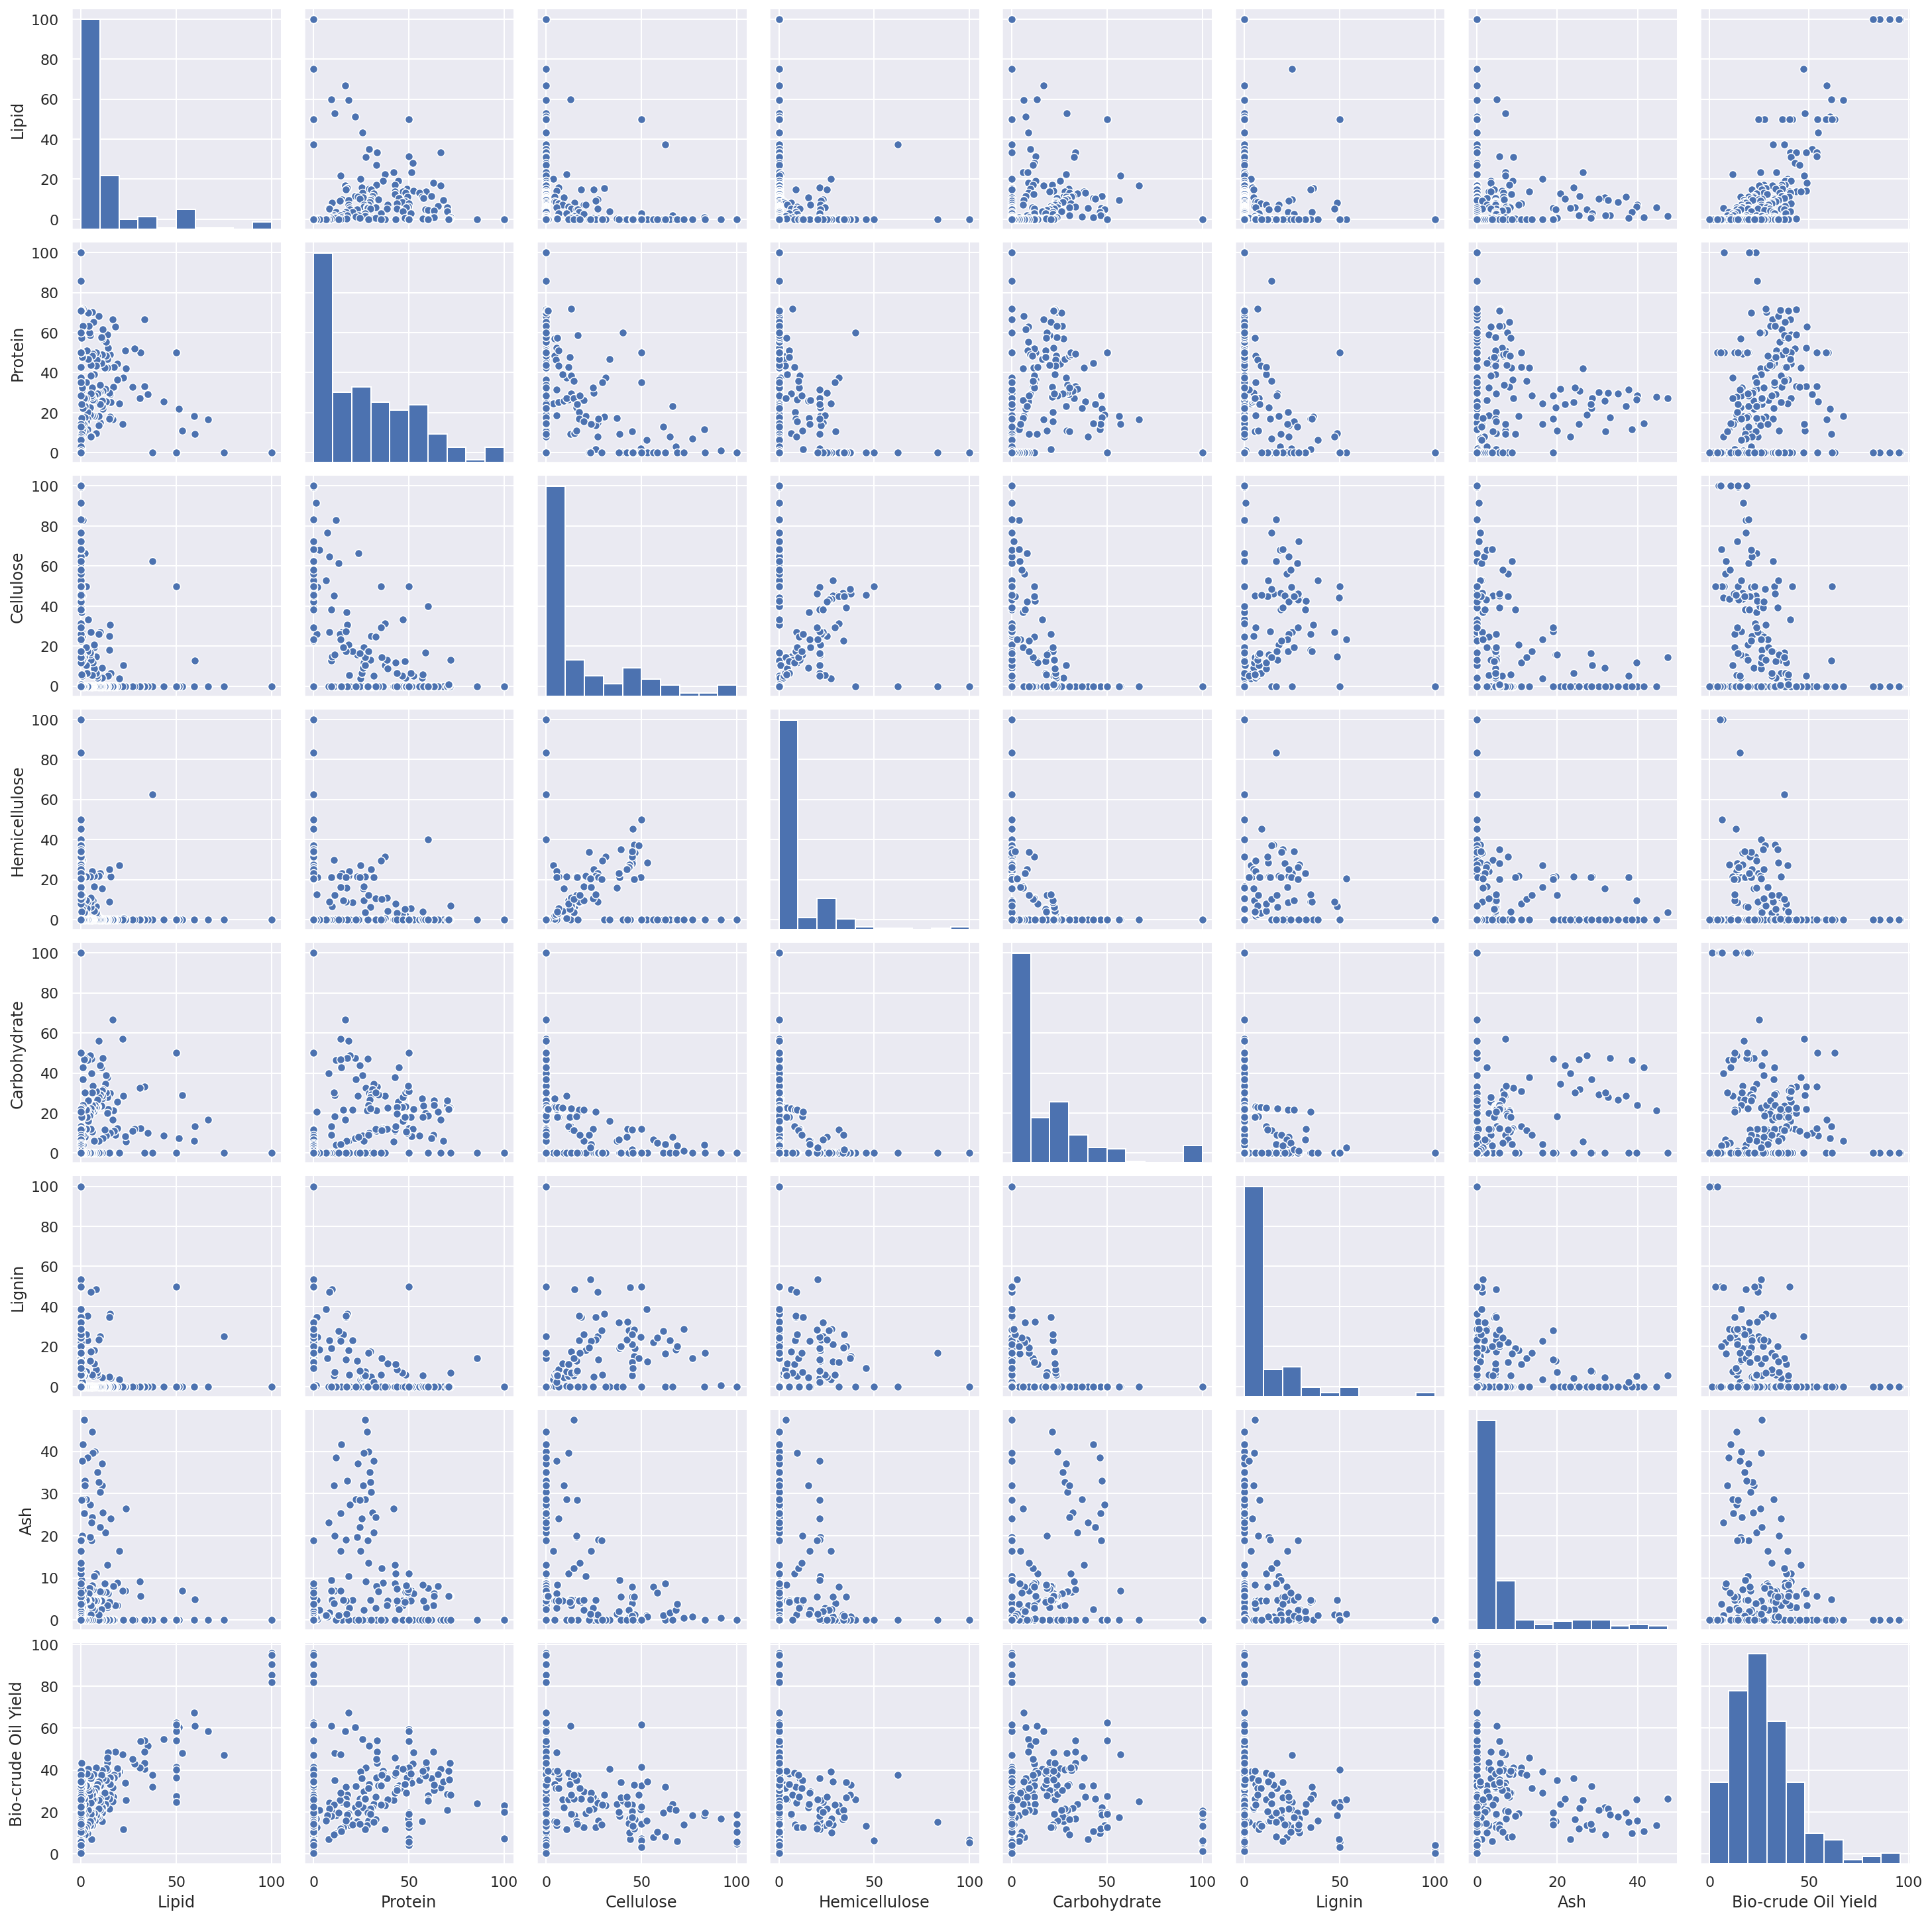

In [8]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Initialization
sns.set()

# Draw the distribution matrix
sns.pairplot(data)

# save figure
plt.savefig('cHB.png')
plt.show()

(array([ 3.,  2.,  8.,  8.,  3.,  5., 10., 13., 11., 12., 20.,  8., 11.,
        12., 11.,  6.,  9.,  9.,  8., 10.,  8.,  8.,  4.,  2.,  2.,  4.,
         1.,  0.,  4.,  0.,  3.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.1   ,  2.0152,  3.9304,  5.8456,  7.7608,  9.676 , 11.5912,
        13.5064, 15.4216, 17.3368, 19.252 , 21.1672, 23.0824, 24.9976,
        26.9128, 28.828 , 30.7432, 32.6584, 34.5736, 36.4888, 38.404 ,
        40.3192, 42.2344, 44.1496, 46.0648, 47.98  , 49.8952, 51.8104,
        53.7256, 55.6408, 57.556 , 59.4712, 61.3864, 63.3016, 65.2168,
        67.132 , 69.0472, 70.9624, 72.8776, 74.7928, 76.708 , 78.6232,
        80.5384, 82.4536, 84.3688, 86.284 , 88.1992, 90.1144, 92.0296,
        93.9448, 95.86  ]),
 <a list of 50 Patch objects>)

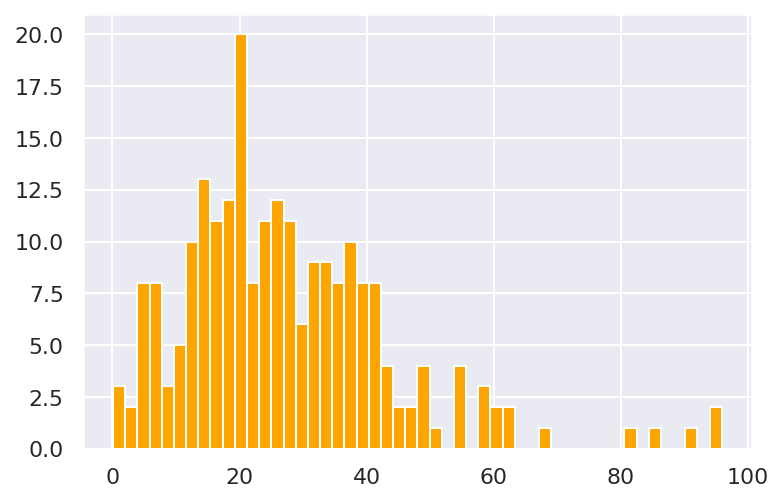

In [9]:
plt.hist(data['Bio-crude Oil Yield'],bins=50,color='orange')

(array([105.,  11.,  14.,   9.,  10.,  13.,   7.,   9.,   5.,   4.,   2.,
          3.,   0.,   1.,   1.,   2.,   4.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   0.,  11.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

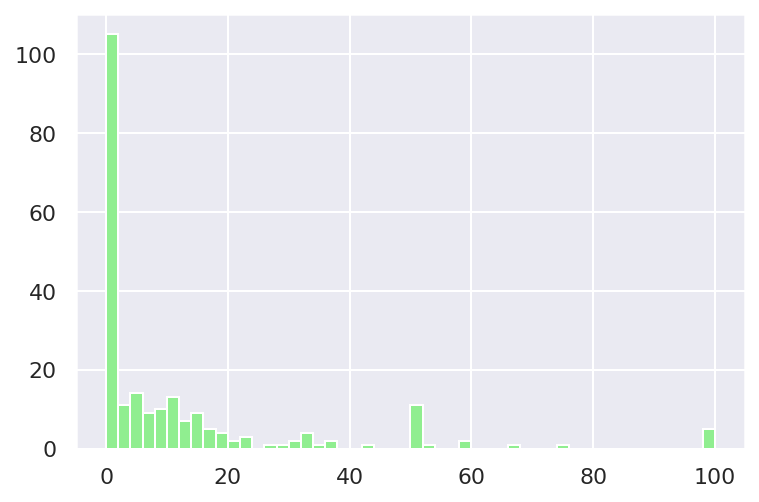

In [10]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


In [11]:
# As correlation coefficient was estimated, the default is Pearson correlation coefficient.
correlation = data.corr()
correlation

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
Lipid,1.000000,-0.106974,-0.292261,-0.205086,-0.085261,-0.184906,-0.155519,0.811398
Protein,-0.106974,1.000000,-0.450545,-0.296215,-0.061490,-0.363806,-0.000390,0.154201
Cellulose,-0.292261,-0.450545,1.000000,0.129705,-0.408932,0.204660,-0.212802,-0.313807
...,...,...,...,...,...,...,...,...
Lignin,-0.184906,-0.363806,0.204660,0.106914,-0.327793,1.000000,-0.150405,-0.323809
Ash,-0.155519,-0.000390,-0.212802,-0.057248,0.062161,-0.150405,1.000000,-0.160701
Bio-crude Oil Yield,0.811398,0.154201,-0.313807,-0.202677,-0.114534,-0.323809,-0.160701,1.000000


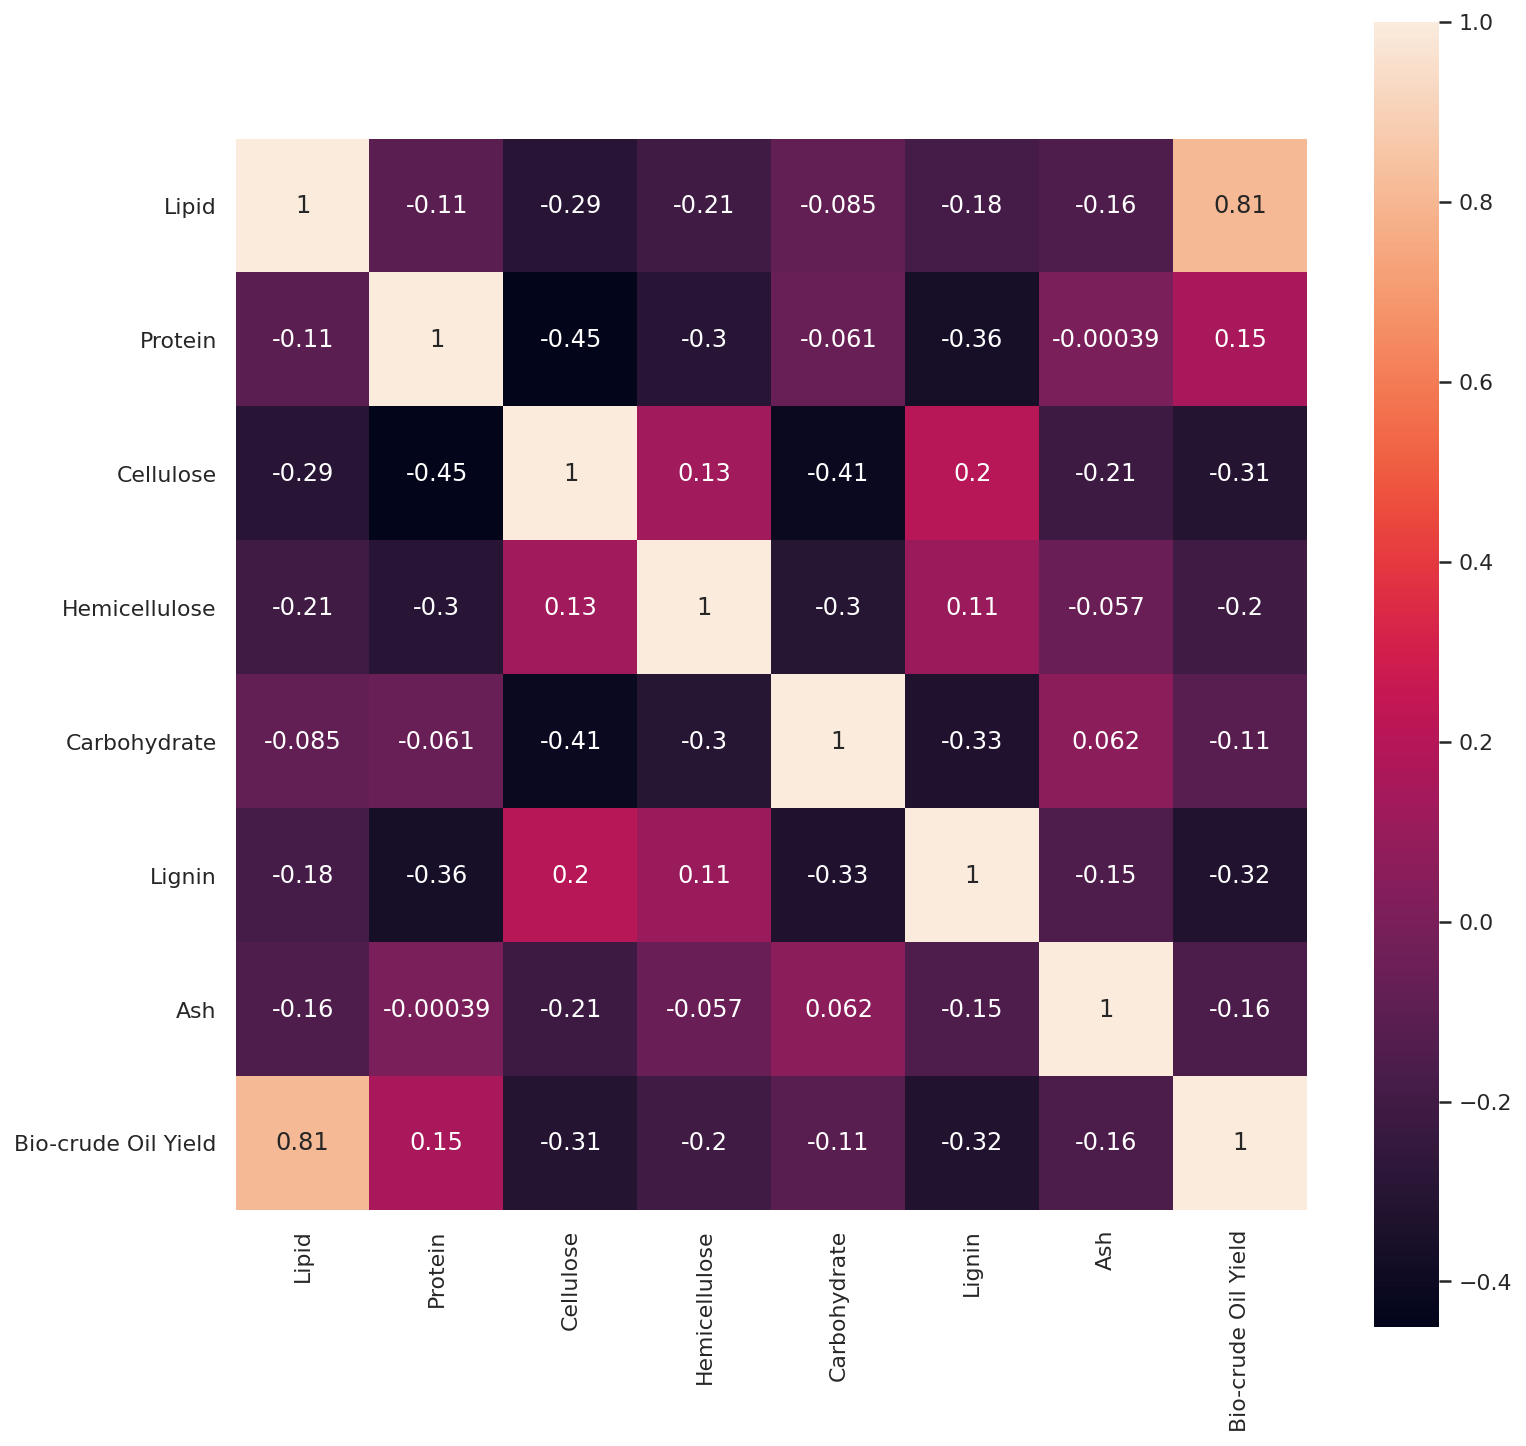

In [12]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [199]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

# Model set up
from sklearn.linear_model import LinearRegression

# Model instantiation
LR=LinearRegression()

# Model training
LR.fit(X_train,y_train)

print ("Intercept: ",LR.intercept_)
print ("Regression coefficient: ",LR.coef_)

Intercept:  23.97237986145998
Regression coefficient:  [ 0.62993575  0.0681807  -0.04277744 -0.03354074 -0.1036159  -0.19814759
 -0.16766778]


In [200]:
# Model evaluation
# (1) MAE(mean_absolute_error)
from sklearn import metrics
# Predict training set and test set
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
# MAE was estimated for training set and test set
y_train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
y_test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
print('MAE of training set: ',y_train_mae)
print('MAE of test set: ',y_test_mae)

MAE of training set:  6.751074095738811
MAE of test set:  6.874799020428943


In [201]:
# (2) MSE(mean_square_error)
# MSE was estimated for training set and test set
y_train_mse = metrics.mean_squared_error(y_train,y_train_pred)
y_test_mse = metrics.mean_squared_error(y_test,y_test_pred)
print('MSE of training set: ',y_train_mse)
print('MSE of test set: ', y_test_mse)

MSE of training set:  73.17657657530856
MSE of test set:  80.33262899288098


In [202]:
# RMSE(root_mean_square_error)
from math import sqrt
y_train_rmse = sqrt(y_train_mse)
y_test_rmse = sqrt(y_test_mse)
print('RMSE of training set: ',y_train_rmse)
print('RMSE of test set: ',y_test_rmse)

RMSE of training set:  8.554330866602516
RMSE of test set:  8.962847147691463


In [203]:
# Coefficient of multiple determination R2 (r2_score)
y_train_r2 = metrics.r2_score(y_train,y_train_pred)
y_test_r2 = metrics.r2_score(y_test,y_test_pred)
print('R2 of training set: ',y_train_r2)
print('R2 of test set: ',y_test_r2)

R2 of training set:  0.7376532619141942
R2 of test set:  0.7014208078878568


In [206]:
# Score can be obtained using the well-trained model 
y_train_score = LR.score(X_train,y_train)
y_test_score = LR.score(X_test,y_test)
print('score of training set: ',y_train_score)
print('score of test set: ',y_test_score)

score of training set:  0.7376532619141942
score of test set:  0.7014208078878568


In [207]:
# Linearity test
from pandas import Series
from scipy.stats import f
# array was converted into series format
y_train_pred = Series(y_train_pred, index=y_train.index)
# SSR and SSE were estimated in the training data
y_train_ssr = y_train_pred.apply(lambda x:(x-y_train.mean())**2).sum()
y_train_sse = y_train.sub(y_train_pred).apply(lambda x:x**2).sum()
# dn is the degree of freedom of SSR, df is the degree of freedom of SSE 
dn = 7
df = y_train.shape[0] - dn - 1
# F value is estimated
y_train_f = (y_train_ssr/dn)/(y_train_sse/df)
# P value is estimated
p = f.sf(y_train_f, dn, df)
# Critical value of significance level of 0.05 was estimated
cr_value = f.isf(0.05,dn,df)
print('F value of training set: ',y_train_f)
print('Critical value of significance level of 0.05: ',cr_value)
print('P value of training set:%.02f'%p)


F value of training set:  69.08869753005168
Critical value of significance level of 0.05:  2.063169191391711
P value of training set:0.00


In [208]:
from scipy.stats import t
def get_tvalue(sse,df,matr,beta,i):
  '''t value is estimated'''
  mse = sse / df
  sbeta = sqrt(matr[i+1,i+1]*mse)
  t=beta/sbeta
  return t

limit = t.isf(0.025,df)
print('Critical value of significance level of 0.05:',limit)

X_train['B']=1
X_train = X_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash'])

# Matrix Conversion
xm = np.mat(X_train)
# Inverse matrix (X' X) was estimated
xmi = np.dot(xm.T, xm).I
index,betas = range(7),LR.coef_
for i,beta in zip(index,betas):
  tvalue = get_tvalue(y_train_sse,df,xmi,beta,i)
  pvalue = t.sf(abs(tvalue),df)*2
  print('t value of beta {0}:'.format(i+1),tvalue)
  print('p value of beta {0}:'.format(i+1),pvalue)

Critical value of significance level of 0.05: 1.9738521694896138
t value of beta 1: 8.151921609711955
p value of beta 1: 7.135513023693693e-14
t value of beta 2: 0.9115206366233172
p value of beta 2: 0.36329686074554834
t value of beta 3: -0.5932923389453074
p value of beta 3: 0.5537648725199955
t value of beta 4: -0.4165858198099274
p value of beta 4: 0.6775007861302265
t value of beta 5: -1.4006463213375853
p value of beta 5: 0.1631213298695816
t value of beta 6: -2.600673812129405
p value of beta 6: 0.010113943730850426
t value of beta 7: -1.847630827581164
p value of beta 7: 0.06637326587517245


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [152]:
# 1.Delete collinear variable
import pandas as pd
data = pd.read_csv('/content/Feed Effect on Biocrude Yield Data ML 080920.csv')

# 1.Delete collinear variable
# Assign data set
X1, y1 = data[['Lipid','Protein','Hemicellulose','Carbohydrate','Lignin','Ash']], data['Bio-crude Oil Yield']

# Set the ratio of training set to test set as 80%:20%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
# Train the model, predict and estimate root_mean_square_error (RMSE) and Multiple coefficient of determination (R2)
LR1 = LinearRegression()
LR1.fit(X1_train, y1_train)
inter,co = LR1.intercept_, LR1.coef_
y1_train_pred = LR1.predict(X1_train)
y1_train_rmse = sqrt(metrics.mean_squared_error(y1_train,y1_train_pred))
y1_train_score = LR1.score(X1_train,y1_train)
print("Regression model： Bio-crude Oil Yield={0}+{1}Lipid+{2}Protein+{3}Hemicellulose+{4}Carbohydrate+{5}Lignin+{6}Ash".format(inter,co[0],co[1],co[2],co[3],co[4],co[5]))
print('RMSE of training set: ',y1_train_rmse)
print('Fit goodness of training set: ',y1_train_score)

# Estimate P value of significance level of 0.05 in F test
y1_train_pred = Series(y1_train_pred, index=y1_train.index)
y1_train_ssr = y1_train_pred.apply(lambda x:(x-y1_train.mean())**2).sum()
y1_train_sse = y1_train.sub(y1_train_pred).apply(lambda x:x**2).sum()
dn1, df1 = 6, y1_train.shape[0]-6-1
y1_train_f = (y1_train_ssr/dn1) / (y1_train_sse/df1)
y1_p = f.sf(y1_train_f, dn1, df1)
print('P value of training set under significance level of 0.05 in F test：%.20f'% y1_p)

# Estimate p value under significance level of 0.05 in t test
def get_t1value(sse,df,matr,beta,i):
  mse = sse / df
  sbeta = sqrt(matr[i+1,i+1]*mse)
  t = beta / sbeta
  return t
X1_train['B'] = 1
X1_train = X1_train.reindex(columns=['B','Lipid','Protein','Hemicellulose','Carbohydrate','Lignin','Ash'])
xm1 = np.mat(X1_train)
xmi1 = np.dot(xm1.T,xm1).I
index, betas = range(6), LR1.coef_
for i, beta in zip(index,betas):
  tvalue = get_t1value(y1_train_sse,df1,xmi1,beta,i)
  pvalue = t.sf(abs(tvalue),df1)*2
  print('P value of beta {0} under significance level of 0.05 in t test: '.format(i+1), pvalue)

Regression model： Bio-crude Oil Yield=18.579637795017025+0.6549841966848777Lipid+0.13727614665173793Protein+-0.01364841102430878Hemicellulose+-0.04844617632174818Carbohydrate+-0.13416230414976701Lignin+-0.08625562505088379Ash
RMSE of training set:  8.58514158464704
Fit goodness of training set:  0.7282272171786787
P value of training set under significance level of 0.05 in F test：0.00000000000000000000
P value of beta 1 under significance level of 0.05 in t test:  7.198769622229427e-39
P value of beta 2 under significance level of 0.05 in t test:  5.251705306113423e-05
P value of beta 3 under significance level of 0.05 in t test:  0.778679745585508
P value of beta 4 under significance level of 0.05 in t test:  0.14793692777835435
P value of beta 5 under significance level of 0.05 in t test:  0.012168192954098574
P value of beta 6 under significance level of 0.05 in t test:  0.1634410616058225


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE of test set: 8.930021451211767
Fit goodness of test set: 0.7294115791310778


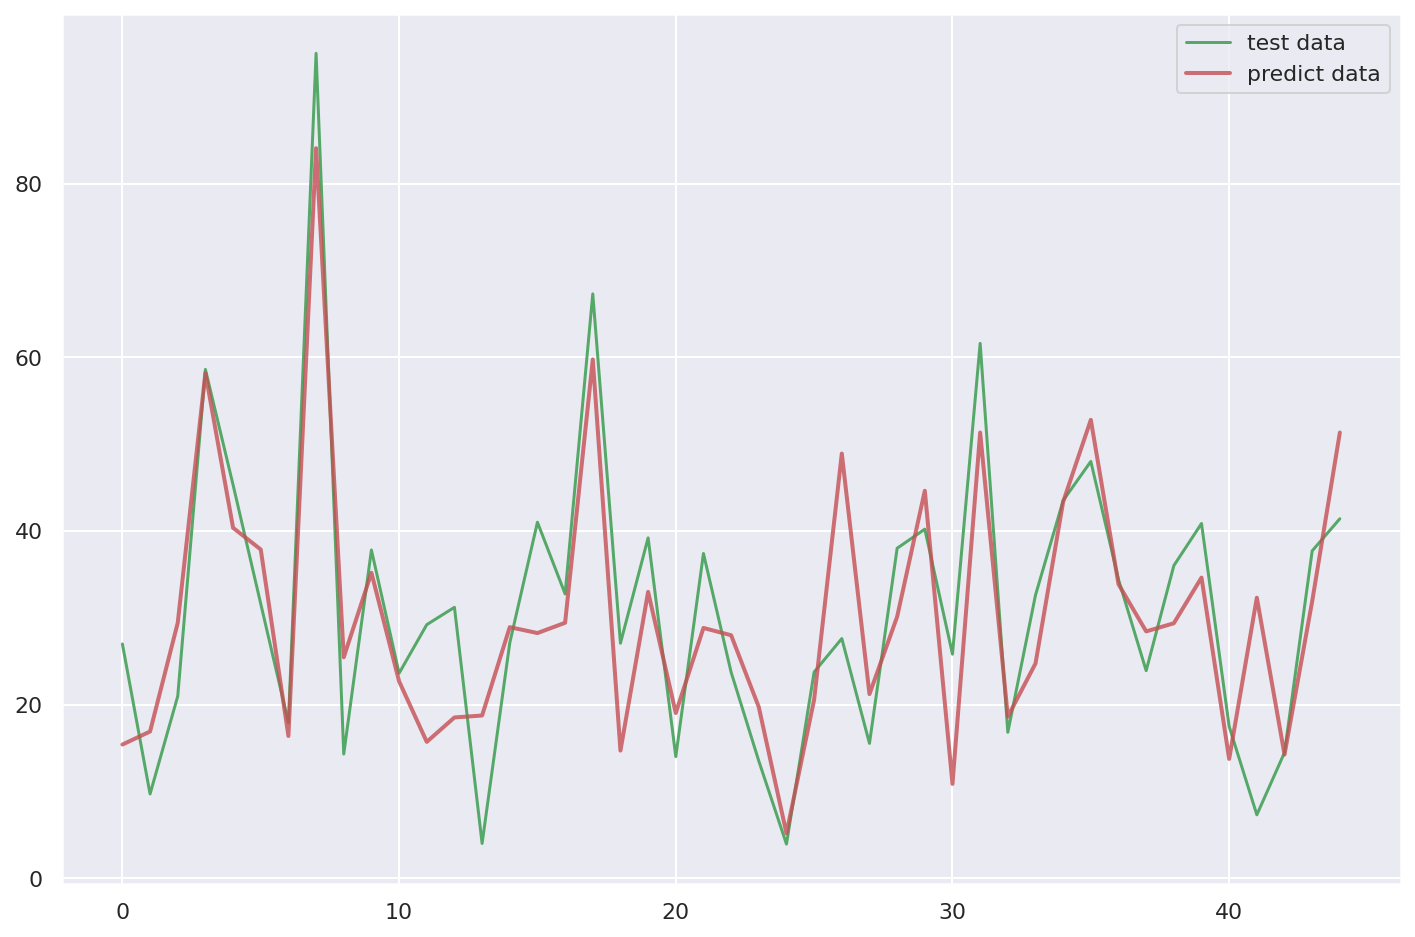

In [153]:
# Model application
import matplotlib.pyplot as plt

# Prediction by the well-trained model
y1_test_pred = LR1.predict(X1_test)
y1_test_rmse = sqrt(metrics.mean_squared_error(y1_test,y1_test_pred))
y1_test_score = LR1.score(X1_test,y1_test)
print('RMSE of test set:', y1_test_rmse)
print('Fit goodness of test set:',y1_test_score)

# Draw plot
plt.figure(figsize=(12,8))
plt.plot(range(len(y1_test)),y1_test,'g',label='test data')
plt.plot(range(len(y1_test_pred)),y1_test_pred,'r',label='predict data',linewidth=2,alpha=0.8)
plt.legend()
plt.show()

In [154]:
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 58.9, 0, 1.1],] # Model Food Waste  
# Show predictions
for i, Oil_Yield in enumerate(LR1.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 32.42 wt%


In [196]:
# 2.Logarithmic Transformation
import pandas as pd
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080920.csv')

data_log=np.log(data)

# Assign data set
X2, y2 = data_log[['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']], data_log['Bio-crude Oil Yield']

# Set the ratio of training set to test set as 80%:20%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

# Train the model, predict and estimate root_mean_square_error (RMSE) and Multiple coefficient of determination (R2)
LR2 = LinearRegression()
LR2.fit (X2_train, y2_train)
inter, co = LR2.intercept_, LR2.coef_
y2_train_pred = LR2.predict(X2_train)
y2_train_rmse = sqrt(metrics.mean_squared_error(y2_train, y2_train_pred))
y2_train_score = LR2.score(X2_train, y2_train)

print("Regression model： Bio-crude Oil Yield={0}+{1}Lipid+{2}Protein+{3}Cellulose+{4}Hemicellulose+{5}Carbohydrate+{6}Lignin+{7}Ash".format(inter,co[0],co[1],co[2],co[3],co[4],co[5],co[6]))
print('RMSE of training set: ',y2_train_rmse)
print('Fit goodness of training set: ',y2_train_score)

# Estimate P value of significance level of 0.05 in F test
y2_train_pred = Series(y2_train_pred, index=y2_train.index)
y2_train_ssr = y2_train_pred.apply(lambda x:(x-y2_train.mean())**2).sum()
y2_train_sse = y2_train.sub(y2_train_pred).apply(lambda x:x**2).sum()
dn2, df2 = 7, y2_train.shape[0]-7-1
y2_train_f = (y2_train_ssr/dn2) / (y2_train_sse/df2)
y2_p = f.sf(y2_train_f, dn2, df2)

print('P value of training set under significance level of 0.05 in F test：%.20f'% y2_p)

# Estimate p value under significance level of 0.05 in t test
def get_t2value(sse,df,matr,beta,i):
  mse = sse / df
  sbeta = sqrt(matr[i+1,i+1]*mse)
  t = beta / sbeta
  return t
X2_train['B'] = 1
X2_train = X2_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash'])
xm2 = np.mat(X2_train)
xmi2 = np.dot(xm2.T,xm2).I
index, betas = range(7), LR2.coef_
for i, beta in zip(index,betas):
  tvalue = get_t2value(y2_train_sse,df2,xmi2,beta,i)
  pvalue = t.sf(abs(tvalue),df2)*2
  print('P value of beta {0} under significance level of 0.05 in t test: '.format(i+1), pvalue)

Regression model： Bio-crude Oil Yield=3.1685858414626242+0.10762469481539054Lipid+0.006753483767892512Protein+0.037893416067283456Cellulose+0.012734936497217875Hemicellulose+-0.0016995301158958416Carbohydrate+-0.041980705706603796Lignin+-0.011361125591764547Ash
RMSE of training set:  0.6321815036830497
Fit goodness of training set:  0.39579515912535407
P value of training set under significance level of 0.05 in F test：0.00000000000000033974
P value of beta 1 under significance level of 0.05 in t test:  3.8457511664205554e-13
P value of beta 2 under significance level of 0.05 in t test:  0.5963107601147021
P value of beta 3 under significance level of 0.05 in t test:  0.007780391534361225
P value of beta 4 under significance level of 0.05 in t test:  0.36319906324873785
P value of beta 5 under significance level of 0.05 in t test:  0.8901183317055663
P value of beta 6 under significance level of 0.05 in t test:  0.01079246948813232
P value of beta 7 under significance level of 0.05 in t

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE of test set: 0.5031680415560751
Fit goodness of test set: 0.38656309554006507


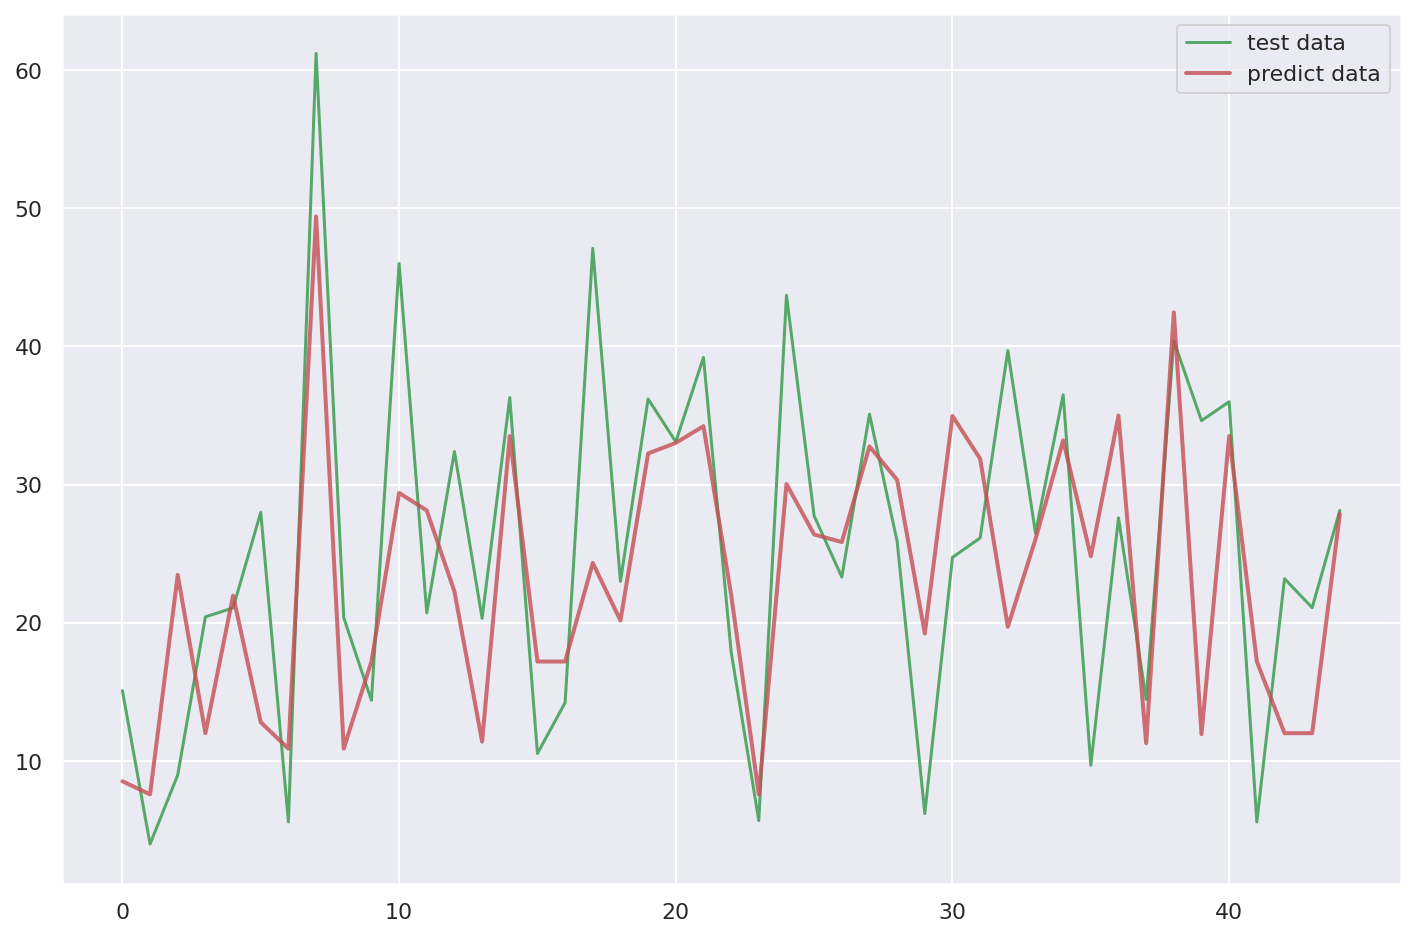

In [197]:
# Model application
import matplotlib.pyplot as plt

# Prediction by the well-trained model
y2_test_pred = LR2.predict(X2_test)
y2_test_rmse = sqrt(metrics.mean_squared_error(y2_test,y2_test_pred))
y2_test_score = LR2.score(X2_test,y2_test)
print('RMSE of test set:', y2_test_rmse)
print('Fit goodness of test set:',y2_test_score)

# Draw plot

y2_test=np.exp(y2_test)
y2_test_pred=np.exp(y2_test_pred)

plt.figure(figsize=(12,8))
plt.plot(range(len(y2_test)),y2_test,'g',label='test data')
plt.plot(range(len(y2_test_pred)),y2_test_pred,'r',label='predict data',linewidth=2,alpha=0.8)
plt.legend()
plt.show()

In [198]:
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data 
# Show predictions
Oil_Yield = LR2.predict(np.log([[21.9,17.8,0.001,0.001,58.9,0.001,1.1]]))
Oil_Yield=np.exp(Oil_Yield)
print("Predicted bio-crude oil yield for the composition of Feedstock:",Oil_Yield)

Predicted bio-crude oil yield for the composition of Feedstock: [31.57819877]
